In [52]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.stats import norm
import BDATools as BDA
from get_data import df as df_full
import scipy.stats as ss

%matplotlib inline

def setup_hist(vals, ax, nbins=30):
    ax.hist(vals, nbins, normed=True, histtype="step")
    ax.hist(vals, nbins, normed=True, color="b", histtype="stepfilled",
            alpha=0.2)
    return ax

In [53]:
df_full.head()

,Binary,F0,F1,F2,Type,W10_ms,name,tauAge,W10
0,NaN,1.441446,-4.357000e-15,NaN,NaN,195.0,J0006+1834,5.24e+06,0.1950
2,NaN,0.805997,-3.667000e-16,7.300000e-28,NaN,142.5,B0011+47,3.48e+07,0.1425
27,NaN,3.141121,-1.481000e-15,NaN,NaN,NaN,J0026+6320,3.36e+07,NaN
29,NaN,3.174603,NaN,NaN,NaN,NaN,J0033+57,nan,NaN
30,NaN,1.096491,NaN,NaN,NaN,NaN,J0033+61,nan,NaN


In [66]:
B1828_F0 = 2.46887171470
df = df_full[np.abs(df_full.F0 - B1828_F0)/B1828_F0 < 0.1]
print df.shape, df_full.shape

(172, 9) (1942, 9)


In [67]:
lnW10 = np.log(df.W10[np.isfinite(df.W10)].values)
W10 = df.W10[np.isfinite(df.W10)].values

In [68]:
shape, loc, scale = ss.lognorm.fit(W10, floc=0)
print "loc={}, scale={}".format(np.log(scale), shape)

loc=-3.73298621437, scale=0.587030887085


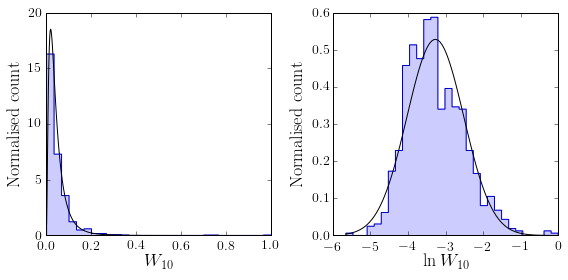

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

quants = np.linspace(W10.min(), W10.max(), 500)
ax1.plot(quants, ss.lognorm.pdf(quants, shape, loc, scale))
ax1 = setup_hist(W10, ax1, 30)
ax1.set_xlabel("$W_{10}$")
ax1.set_ylabel("Normalised count")
                               
lnquants = np.linspace(lnW10.min(), lnW10.max(), 100)
ax2.plot(lnquants, ss.norm.pdf(lnquants, loc=np.log(scale), scale=shape))
ax2 = setup_hist(lnW10, ax2, 30)
ax2.set_xlabel("$\ln W_{10}$")
ax2.set_ylabel("Normalised count")
                               
fig.tight_layout()
plt.savefig("lnW10_distribution.pdf")

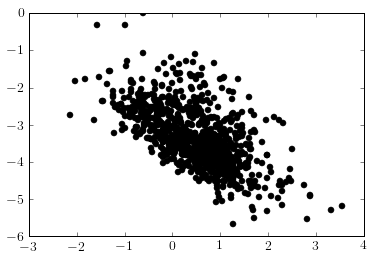

In [62]:
W10 = df_full.W10.values
F0 = df_full.F0.values
plt.plot(np.log(F0), np.log(W10), "o")